# Programming Exercise 5:  Neural Networks with Keras

In [1]:
import os
import numpy as np
from scipy.io import loadmat
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2

import utils
%matplotlib inline

Using TensorFlow backend.


## Neural Networks

In the previous exercise, you implemented feedforward propagation for neural networks and used it to predict handwritten digits with the weights we provided. In this exercise, you will implement the backpropagation algorithm to learn the parameters for the neural network.

We start the exercise by first loading the dataset. 

In [2]:
#  training data stored in arrays X, y
data = loadmat(os.path.join('Data', 'ex4data1.mat'))
X, y = data['X'], data['y'].ravel()

# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
y[y == 10] = 0

# Number of training examples
m = y.size

### 1.1 Visualizing the data

You will begin by visualizing a subset of the training set, using the function `displayData`, which is the same function we used in Exercise 3. It is provided in the `utils.py` file for this assignment as well. The dataset is also the same one you used in the previous exercise.

There are 5000 training examples in `ex4data1.mat`, where each training example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. Each
of these training examples becomes a single row in our data matrix $X$. This gives us a 5000 by 400 matrix $X$ where every row is a training example for a handwritten digit image.

$$ X = \begin{bmatrix} - \left(x^{(1)} \right)^T - \\
- \left(x^{(2)} \right)^T - \\
\vdots \\
- \left(x^{(m)} \right)^T - \\
\end{bmatrix}
$$

The second part of the training set is a 5000-dimensional vector `y` that contains labels for the training set. 
The following cell randomly selects 100 images from the dataset and plots them.

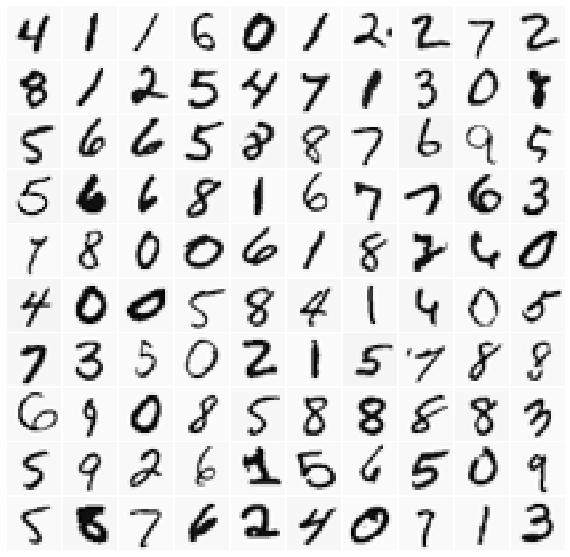

In [3]:
# Randomly select 100 data points to display
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

utils.displayData(sel)

### 1.2 Model representation

Our neural network is shown in the following figure.

![](Figures/neural_network.png)

It has 3 layers - an input layer, a hidden layer and an output layer. Recall that our inputs are pixel values
of digit images. Since the images are of size $20 \times 20$, this gives us 400 input layer units (not counting the extra bias unit which always outputs +1). The training data was loaded into the variables `X` and `y` above.

You have been provided with a set of network parameters ($\Theta^{(1)}, \Theta^{(2)}$) already trained by us. These are stored in `ex4weights.mat` and will be loaded in the next cell of this notebook into `Theta1` and `Theta2`. The parameters have dimensions that are sized for a neural network with 25 units in the second layer and 10 output units (corresponding to the 10 digit classes).

In [4]:
# Setup the parameters you will use for this exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 0 to 9

lambda_ = 1  # regularization parameter

cost_function = 'categorical_crossentropy'  # logistic regression loss function for multiclassification problems
optimizer = 'adam'  # Common optimizer, like gradient descent algorithm
metrics = ['accuracy']  # metric to look at when optimizing
regularizer = l2(lambda_)

In [5]:
y_encoded = y.reshape(-1)
y_encoded = np.eye(num_labels)[y_encoded]

In [6]:
# define the keras model
model = Sequential()
model.add(Dense(hidden_layer_size, input_dim=input_layer_size, activation='sigmoid', activity_regularizer=regularizer))
model.add(Dense(num_labels, activation='softmax', activity_regularizer=regularizer))

In [7]:
# compile the keras model
model.compile(loss=cost_function, optimizer=optimizer, metrics=metrics)

In [8]:
# fit the keras model on the dataset
model.fit(X, y_encoded, epochs=100, batch_size=10)

Epoch 1/100
5000/5000 [==============================] - 1s 200us/step - loss: 7.2291 - accuracy: 0.1284
Epoch 2/100
5000/5000 [==============================] - 1s 157us/step - loss: 3.5236 - accuracy: 0.1862
Epoch 3/100
5000/5000 [==============================] - 1s 164us/step - loss: 3.3912 - accuracy: 0.1906
Epoch 4/100
5000/5000 [==============================] - 1s 161us/step - loss: 3.3468 - accuracy: 0.1834
Epoch 5/100
5000/5000 [==============================] - 1s 174us/step - loss: 3.3255 - accuracy: 0.1900
Epoch 6/100
5000/5000 [==============================] - 1s 165us/step - loss: 3.3134 - accuracy: 0.1844
Epoch 7/100
5000/5000 [==============================] - 1s 157us/step - loss: 3.3058 - accuracy: 0.1816
Epoch 8/100
5000/5000 [==============================] - 1s 157us/step - loss: 3.3004 - accuracy: 0.1904
Epoch 9/100
5000/5000 [==============================] - 1s 156us/step - loss: 3.2961 - accuracy: 0.1942
Epoch 10/100
5000/5000 [==============================]

Epoch 78/100
5000/5000 [==============================] - 1s 183us/step - loss: 2.7492 - accuracy: 0.9564
Epoch 79/100
5000/5000 [==============================] - 1s 189us/step - loss: 2.7475 - accuracy: 0.9582
Epoch 80/100
5000/5000 [==============================] - 1s 188us/step - loss: 2.7469 - accuracy: 0.9572
Epoch 81/100
5000/5000 [==============================] - 1s 192us/step - loss: 2.7453 - accuracy: 0.9582
Epoch 82/100
5000/5000 [==============================] - 1s 187us/step - loss: 2.7442 - accuracy: 0.9582
Epoch 83/100
5000/5000 [==============================] - 1s 190us/step - loss: 2.7428 - accuracy: 0.9596
Epoch 84/100
5000/5000 [==============================] - ETA: 0s - loss: 2.7406 - accuracy: 0.95 - 1s 190us/step - loss: 2.7413 - accuracy: 0.9590
Epoch 85/100
5000/5000 [==============================] - 1s 191us/step - loss: 2.7406 - accuracy: 0.9608
Epoch 86/100
5000/5000 [==============================] - 1s 196us/step - loss: 2.7394 - accuracy: 0.9608
Epoc

In [9]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y_encoded)
print('Accuracy: %.2f' % (accuracy*100))

5000/5000 [==============================] - 0s 39us/step
Accuracy: 96.84


In [10]:
# Alternative to previous cell
# make class predictions with the model
predictions = model.predict_classes(X)

In [11]:
# summarize the first 5 cases
for i in np.random.choice(X.shape[0], 20):
    print('%d (expected %d)' % (predictions[i], y[i]))

6 (expected 6)
0 (expected 0)
5 (expected 5)
4 (expected 4)
8 (expected 8)
7 (expected 7)
7 (expected 7)
0 (expected 0)
9 (expected 9)
4 (expected 4)
2 (expected 2)
8 (expected 8)
4 (expected 4)
1 (expected 1)
0 (expected 0)
0 (expected 0)
6 (expected 6)
9 (expected 9)
7 (expected 7)
2 (expected 2)


## 3 Visualizing the Hidden Layer

One way to understand what your neural network is learning is to visualize what the representations captured by the hidden units. Informally, given a particular hidden unit, one way to visualize what it computes is to find an input $x$ that will cause it to activate (that is, to have an activation value 
($a_i^{(l)}$) close to 1). For the neural network you trained, notice that the $i^{th}$ row of $\Theta^{(1)}$ is a 401-dimensional vector that represents the parameter for the $i^{th}$ hidden unit. If we discard the bias term, we get a 400 dimensional vector that represents the weights from each input pixel to the hidden unit.

Thus, one way to visualize the “representation” captured by the hidden unit is to reshape this 400 dimensional vector into a 20 × 20 image and display it (It turns out that this is equivalent to finding the input that gives the highest activation for the hidden unit, given a “norm” constraint on the input (i.e., $||x||_2 \le 1$)). 

The next cell does this by using the `displayData` function and it will show you an image with 25 units,
each corresponding to one hidden unit in the network. In your trained network, you should find that the hidden units corresponds roughly to detectors that look for strokes and other patterns in the input.

In [12]:
Theta1 = model.get_weights()[0]

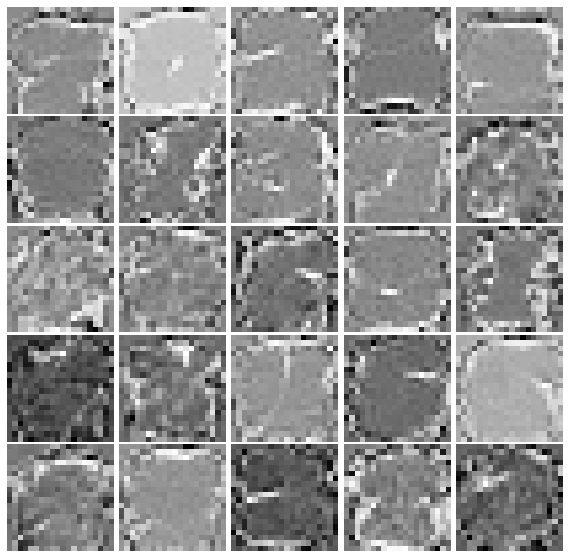

In [13]:
utils.displayData(Theta1.T)